**Name - Mohammad Saify Sheikh**


**Tasks Completed**

Data Cleaning & Preprocessing: Handling missing values, formatting, and merging datasets.

**Exploratory Data Analysis (EDA) -**
 - Distribution of customer regions.
 - Top selling products.
 - Analysis of customer sign-up trends over time.
 - Sales analysis by product category.
 - Relationship between product price and quantity sold.
 - Visualization: Various visualizations (bar plots, scatter plots) to uncover trends and patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
%matplotlib inline

customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [3]:
print("🔹 Customers Dataset:")
print(customers.head(), "\n")
print("🔹 Products Dataset:")
print(products.head(), "\n")
print("🔹 Transactions Dataset:")
print(transactions.head(), "\n")

🔹 Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

🔹 Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

🔹 Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T

In [4]:
# Checking for Missing Values
print("🔍 Missing Values:\n")
print("Customers:\n", customers.isnull().sum(), "\n")
print("Products:\n", products.isnull().sum(), "\n")
print("Transactions:\n", transactions.isnull().sum(), "\n")

customers.fillna({"Region": "Unknown"}, inplace=True)
transactions.dropna(inplace=True)

print("✅ Missing values after handling:\n")
print(transactions.isnull().sum())


🔍 Missing Values:

Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 

✅ Missing values after handling:

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
# Converting Date Columns to Datetime Format
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

# Handling Duplicates
print("🔍 Duplicate Entries:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

# Dropping duplicates if found
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

🔍 Duplicate Entries:
Customers: 0
Products: 0
Transactions: 0


In [6]:
print("📊 Transactions Summary:")
print(transactions.describe())

# Checking Unique Values
print("\nUnique Customers:", transactions["CustomerID"].nunique())
print("Unique Products:", transactions["ProductID"].nunique())


📊 Transactions Summary:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639

Unique Customers: 199
Unique Products: 100


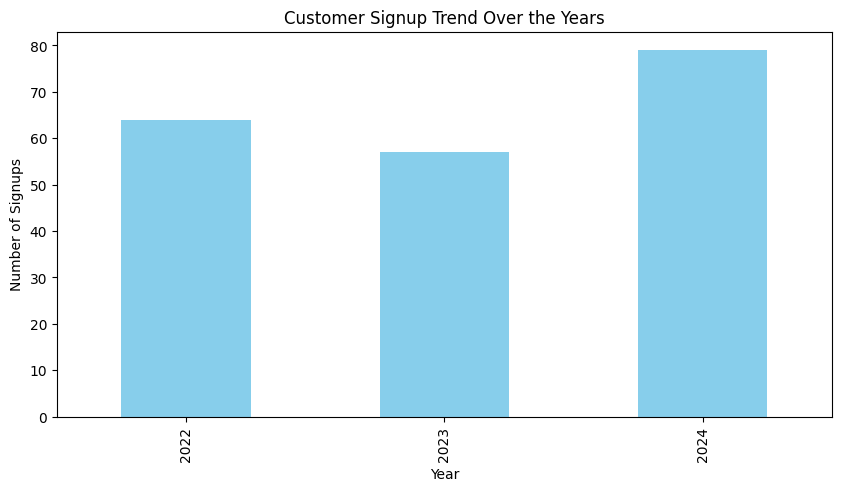

In [7]:
# Customer Signup Trend
plt.figure(figsize=(10,5))
customers["SignupDate"].dt.year.value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.title("Customer Signup Trend Over the Years")
plt.show()

<ipython-input-8-4545428b4d88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=customers["Region"], order=customers["Region"].value_counts().index, palette="viridis")


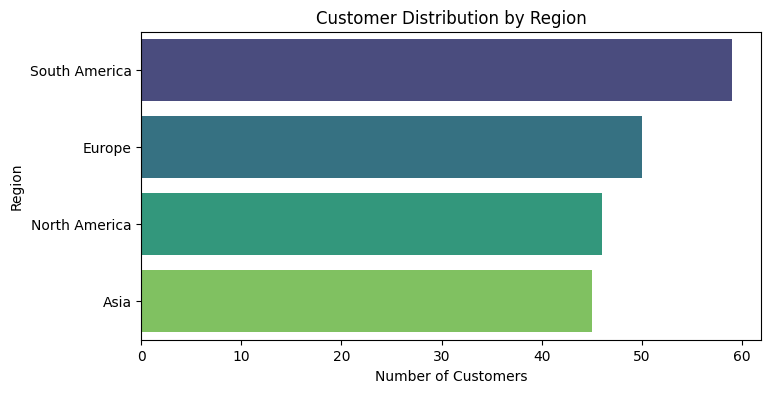

In [8]:
# Customers by Region
plt.figure(figsize=(8,4))
sns.countplot(y=customers["Region"], order=customers["Region"].value_counts().index, palette="viridis")
plt.xlabel("Number of Customers")
plt.ylabel("Region")
plt.title("Customer Distribution by Region")
plt.show()

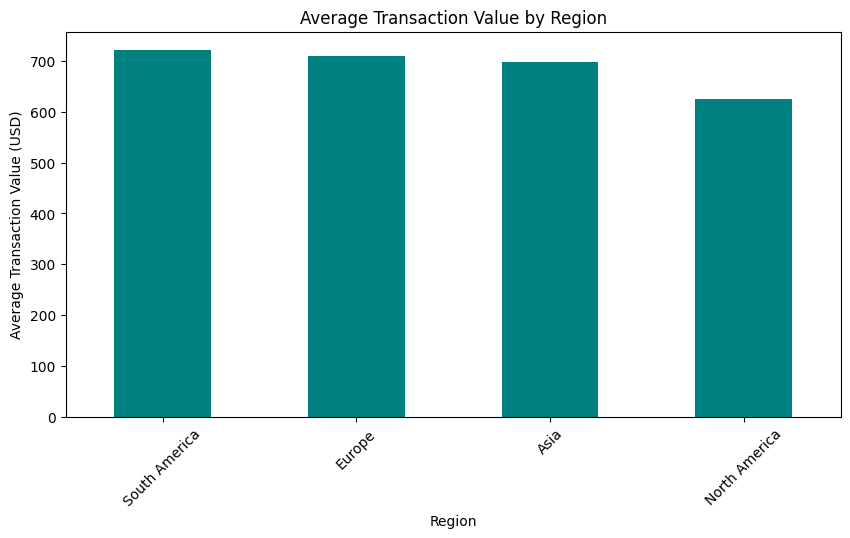

In [15]:
# Average Transaction Value by Region
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
transactions_merged = transactions.merge(customers, on="CustomerID")
region_avg_transaction = transactions_merged.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
region_avg_transaction.plot(kind="bar", color="teal")
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-5f42d1e344e9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products["ProductName"], x=top_products["Quantity"], palette="coolwarm")


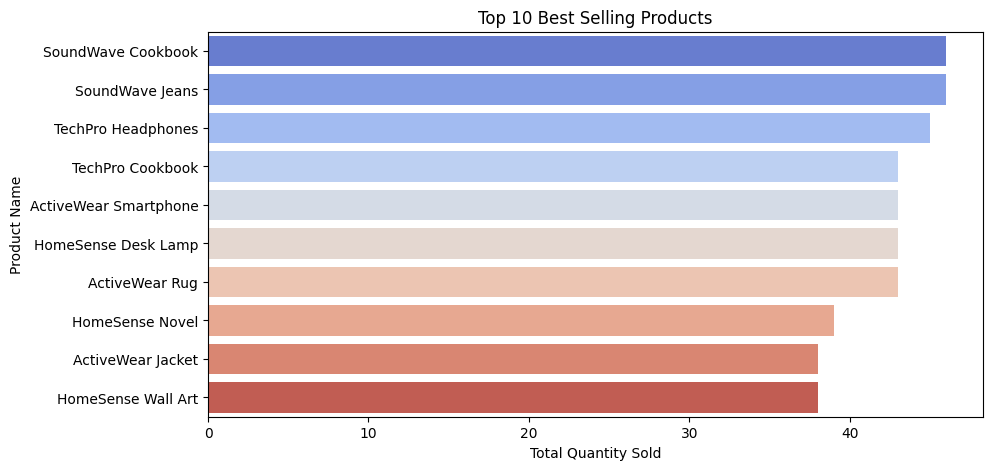

In [13]:
# Top Selling Products
top_products = transactions.groupby("ProductID")[["Quantity"]].sum().nlargest(10, "Quantity").reset_index()

# Merging with products dataset to get product names
top_products = top_products.merge(products, on="ProductID")

# Plotting the Top 10 Best Selling Products
plt.figure(figsize=(10,5))
sns.barplot(y=top_products["ProductName"], x=top_products["Quantity"], palette="coolwarm")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Best Selling Products")
plt.show()


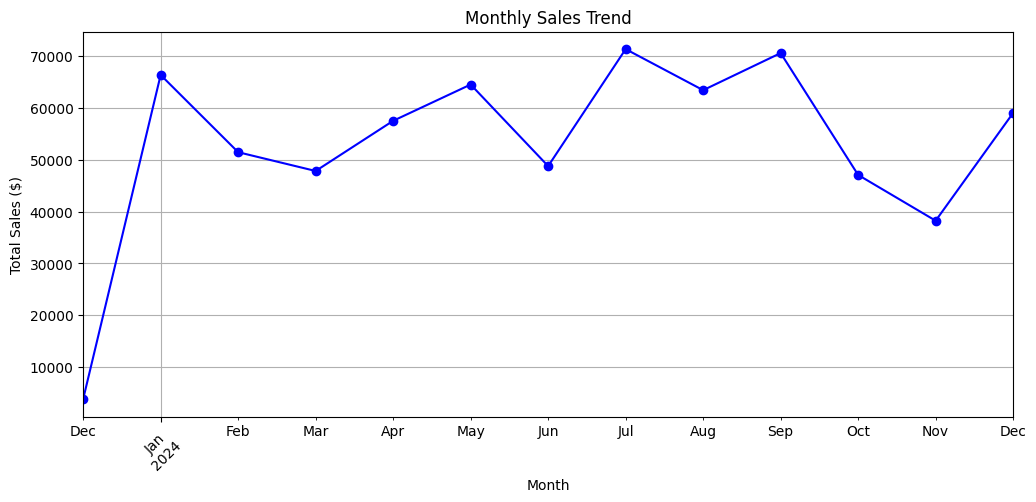

In [10]:
# Monthly Sales Analysis
transactions["YearMonth"] = transactions["TransactionDate"].dt.to_period("M")
monthly_sales = transactions.groupby("YearMonth")["TotalValue"].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(marker="o", linestyle="-", color="blue")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()


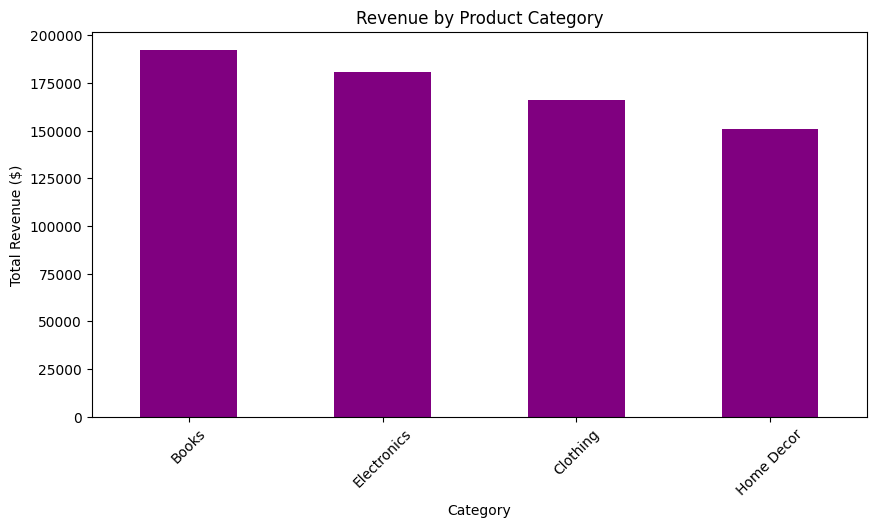

In [11]:
# Category-wise Revenue
category_revenue = transactions.merge(products, on="ProductID").groupby("Category")["TotalValue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
category_revenue.plot(kind="bar", color="purple")
plt.xlabel("Category")
plt.ylabel("Total Revenue ($)")
plt.title("Revenue by Product Category")
plt.xticks(rotation=45)
plt.show()


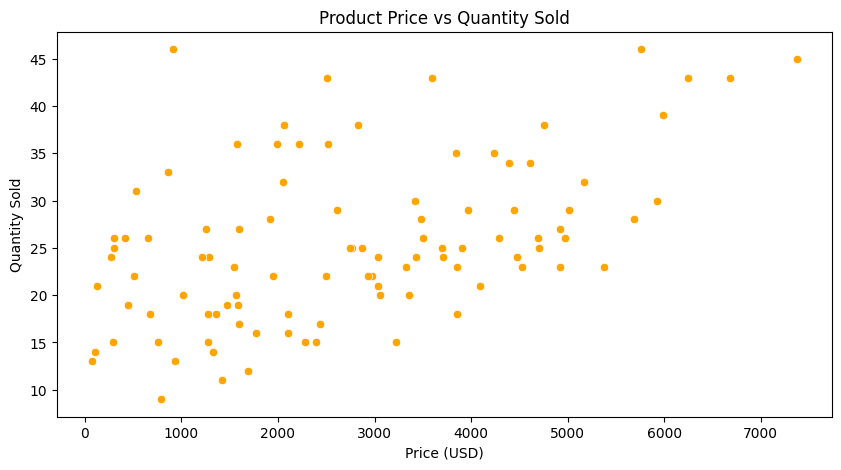

In [21]:
# Product Price vs. Quantity Sold
price_quantity_sales = transactions.merge(products, on="ProductID")

product_price_quantity = price_quantity_sales.groupby("ProductID")[["Price_y", "Quantity"]].sum().reset_index()

plt.figure(figsize=(10,5))
sns.scatterplot(x="Price_y", y="Quantity", data=product_price_quantity, color="orange")
plt.title("Product Price vs Quantity Sold")
plt.xlabel("Price (USD)")
plt.ylabel("Quantity Sold")
plt.show()

In [17]:
# Repeat Customer Purchases
repeat_customers = transactions_merged.groupby("CustomerID")["TransactionID"].count().reset_index()
repeat_customers = repeat_customers[repeat_customers["TransactionID"] > 1]

repeat_customer_count = repeat_customers["CustomerID"].nunique()

print(f"Number of repeat customers: {repeat_customer_count}")


Number of repeat customers: 187
